In [3]:
%matplotlib notebook

from islpy import *
import numpy as np
from IPython.display import Image
from simplify.plot import plot_3d_sets
from islpy import BasicSet, BasicMap

In [83]:
def split(s, aff_str):
    if not aff_str:
        return [s]
    cut = BasicSet('{{[i,j,k] : {}}}'.format(aff_str))
    # build two pieces with 
    i = s.intersect(cut)
    diff = s - i
    p1, p2 = diff.get_basic_sets()
    p1 = p1.union(i).convex_hull()

    return [p1, p2]

def split_vs(s, *vertices):
    num_indices = s.get_space().dim(dim_type.out)
    patch = Set('{{{}}}'.format('; '.join(vertices))).convex_hull()
    eq_constraints = [c for c in patch.get_constraints() if c.is_equality()]
    assert len(eq_constraints) == 1
    eqc = eq_constraints[0]
    cut = BasicSet.universe(s.get_space()).add_constraint(eqc)
    i = s.intersect(cut)
    diff = s - i
    p1, p2 = diff.get_basic_sets()
    p1 = p1.union(i).convex_hull()

    return [p1, p2]

def split_v(s, cut):
    # build two pieces with 
    i = s.intersect(cut)
    diff = s - i
    p1, p2 = diff.get_basic_sets()
    p1 = p1.union(i).convex_hull()

    return [p1, p2]

In [77]:
s = Set('{ [6,0]; [0,14]; }').convex_hull()

eq_constraints = [c for c in s.get_constraints() if c.is_equality()]
assert len(eq_constraints) == 1
eqc = eq_constraints[0]
h = BasicSet.universe(s.get_space()).add_constraint(eqc)
s, h

s.get_space().dim(dim_type.out)

2

# 1D accumulation & 2D reuse

We have the following base cases and general cases.

Assume we've first done CoB to put:  
\- acummulation upwards along $\hat{k}$  
\- reuse horizontally in the $ij$-plane (meaning ANY face in the $ij$-plane will ALWAYS be invariant regardless of the choice of $\rho$

## Base B1 - good tetrahedron - 1 boundary face, 1 invariant face

<IPython.core.display.Javascript object>


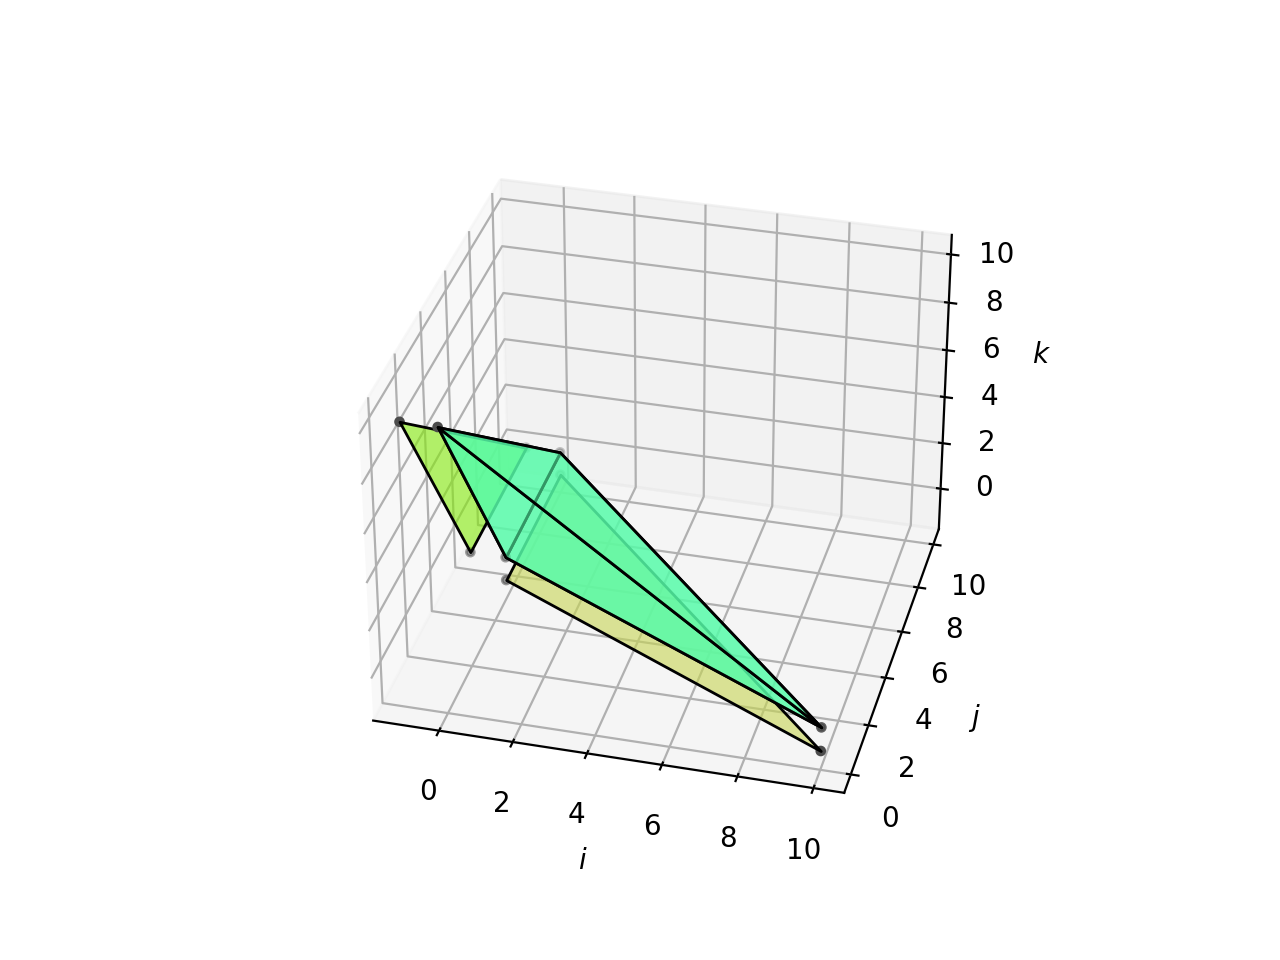

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [5]:
s = Set('{[0,5,0]; [10,0,0]; [0,10,0]; [0,0,10];}').convex_hull()

i = Set('{[0,5,0]; [10,0,0]; [0,10,0];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j,k-1]}'))
b = Set('{[0,5,0]; [0,10,0]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))

plot_3d_sets([s, i, b])

## Base B2 - good tetrahedron - 2 boundary faces

There are only 2 oblique faces. Do the following:
1. pick either oblique face and select a $\rho$ to make it invariant
2. if $\rho$ labels the other oblique face as $\ominus$ then negate it
3. this leave a single oblique face into which the 2006 recursion proceeds

We have already shown that we can always simplify any reduction 2D reduction. So we're done.

<IPython.core.display.Javascript object>


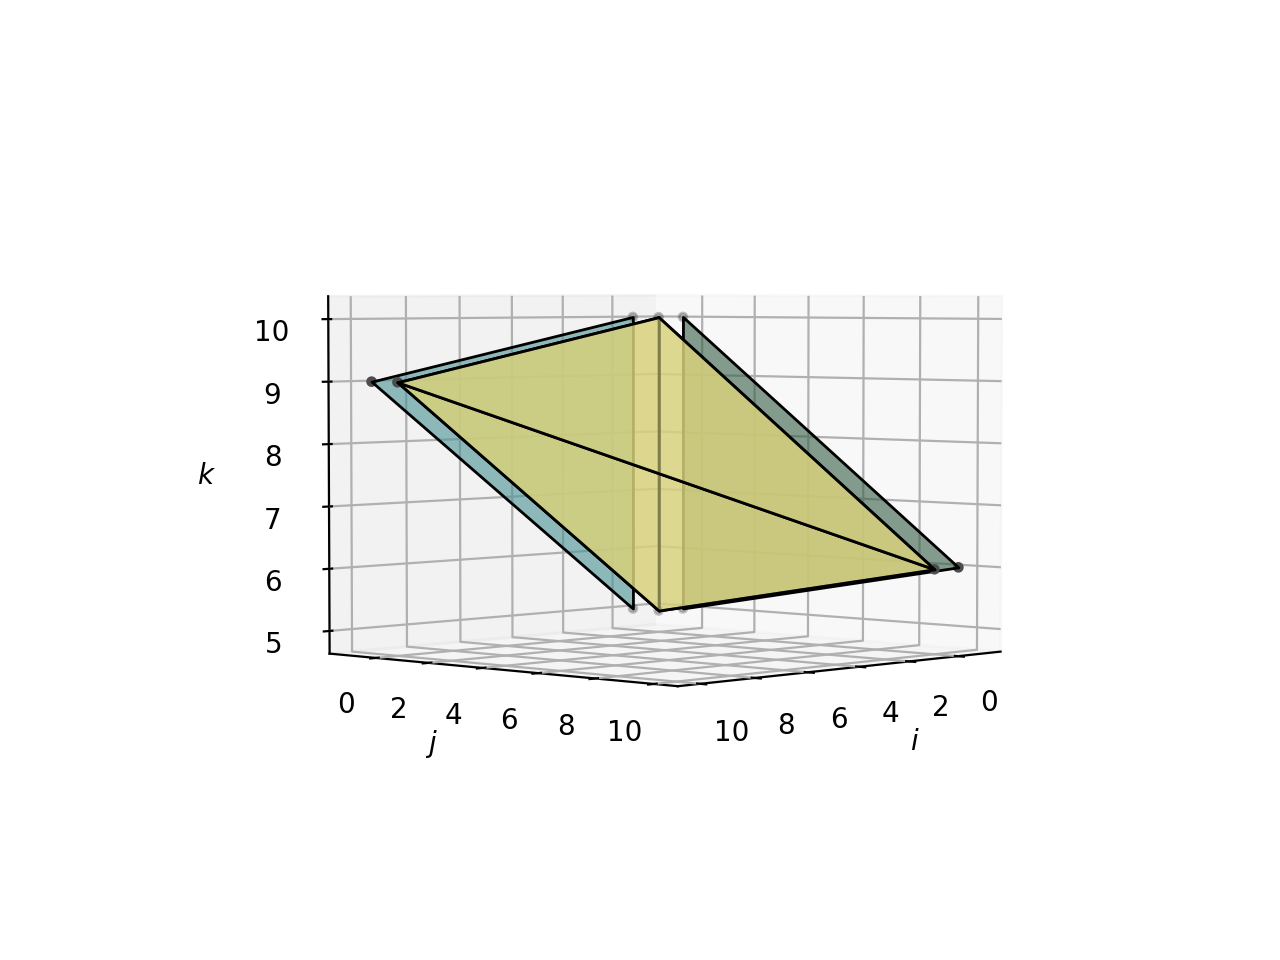

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [8]:
# 2 acute boundary faces
s = Set('{[0,0,5]; [10,0,9]; [0,10,6]; [0,0,10];}').convex_hull()
S = [s]

b1 = Set('{[0,0,5]; [0,10,6]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))
b2 = Set('{[0,0,5]; [10,0,9]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j-1,k]}'))
S += [b1, b2]


plot_3d_sets(S)

## Scenario 1) 1 invariant face, 3 oblique faces

## Scenario 1a) 1 invariant face, 3 oblique faces, top vertex interior

<IPython.core.display.Javascript object>


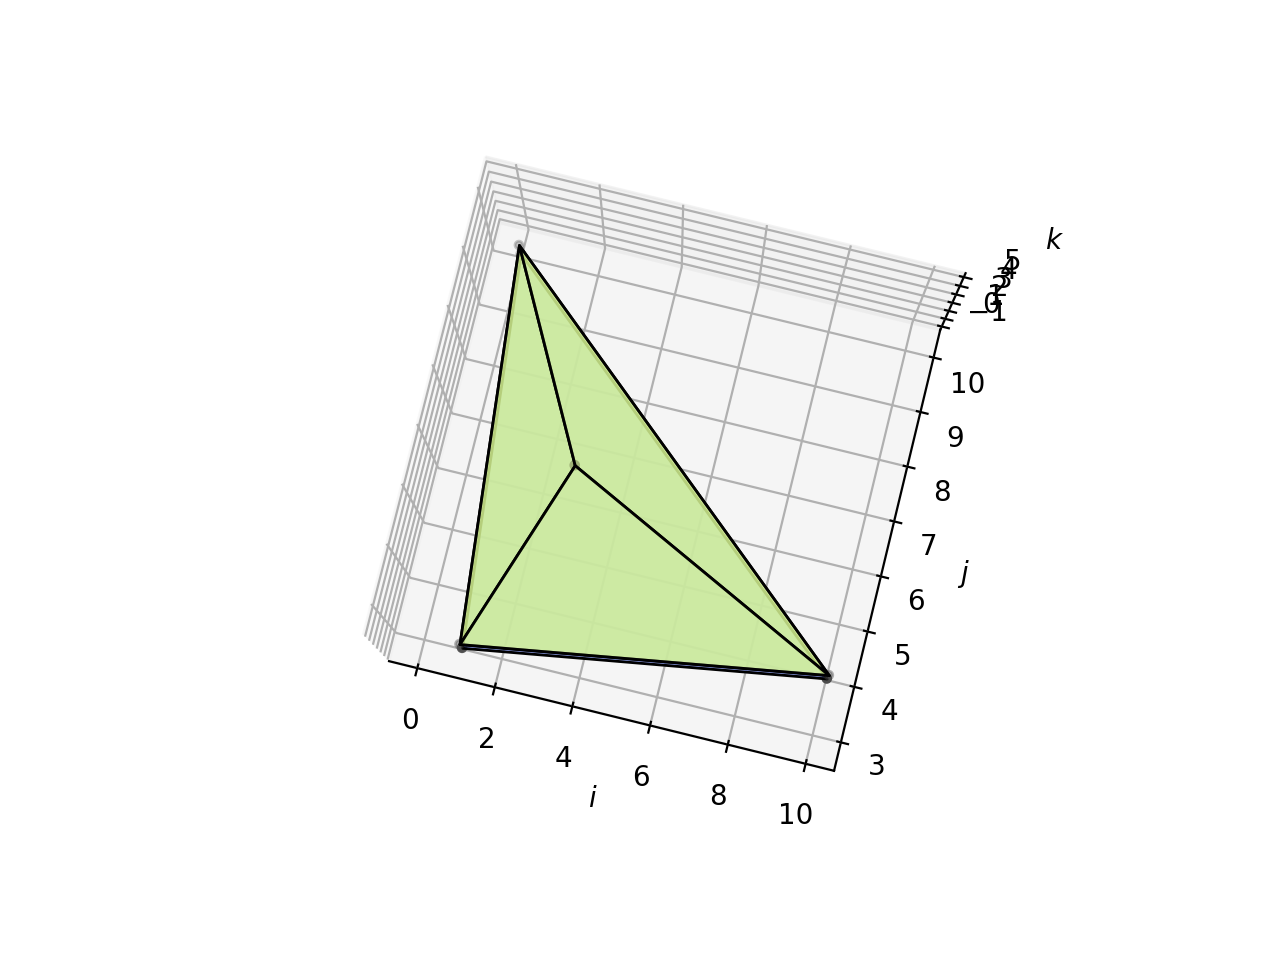

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [9]:
# 1 invariant face
# subcase - top vertex interior
s = Set('{[1,3,0]; [10,4,0]; [0,10,0]; [3,6,5];}').convex_hull()
S = [s]

i1 = Set('{[1,3,0]; [10,4,0]; [0,10,0];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j,k-1]}'))
S += [i1]

plot_3d_sets(S)

### resolution - single boundary cut through any top edge produces 2 good B1 tetrahedra

<IPython.core.display.Javascript object>


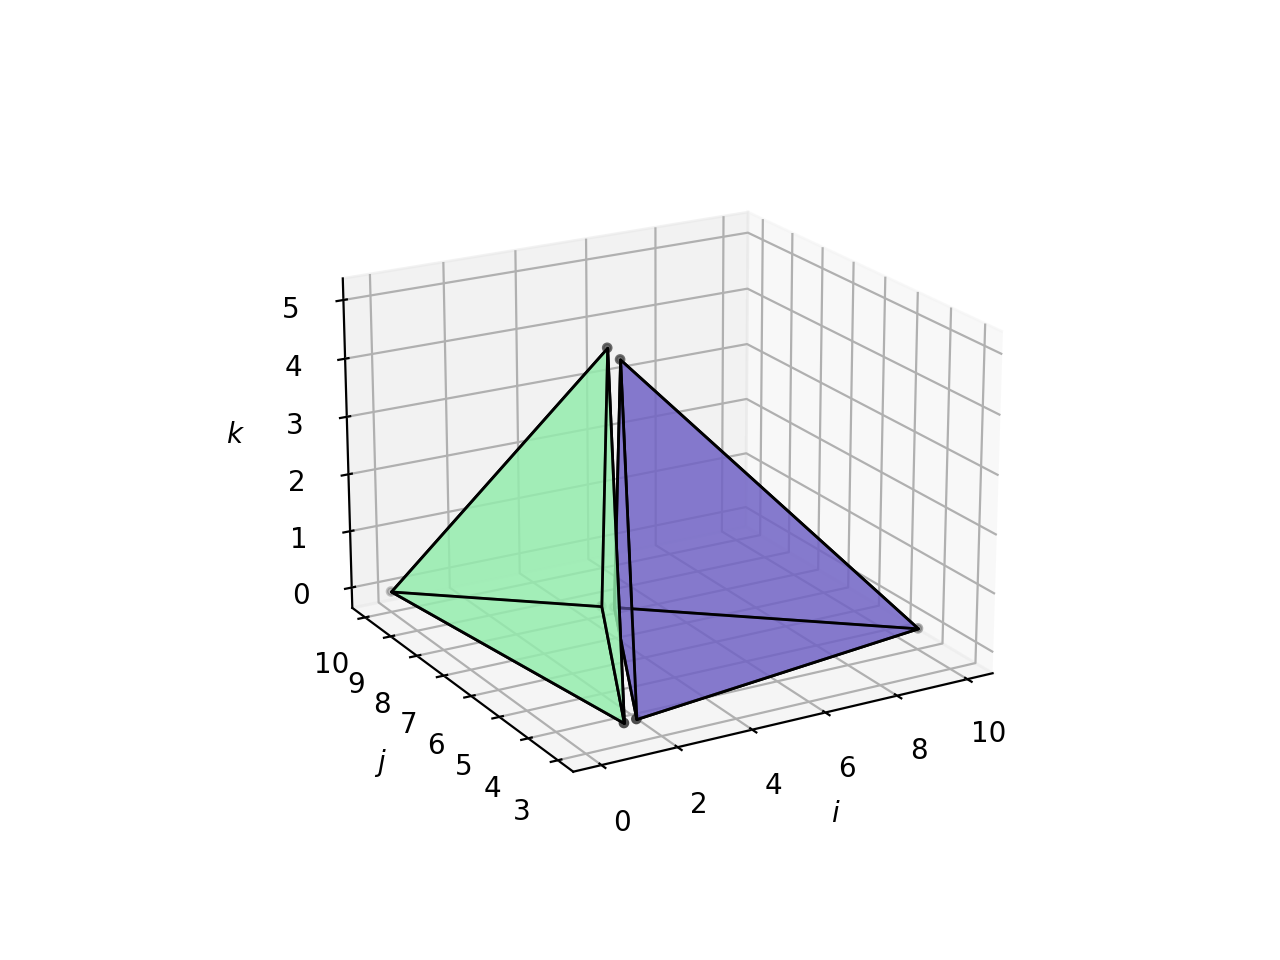

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [10]:
# 1 invariant face
# subcase - top vertex interior
s = Set('{[1,3,0]; [10,4,0]; [0,10,0]; [3,6,5];}').convex_hull()

# resolution
S = split(s, "3i=2j-2")

plot_3d_sets(S)

## Scenario 1b) 1 invariant face, 3 oblique faces, top vertex exterior

<IPython.core.display.Javascript object>


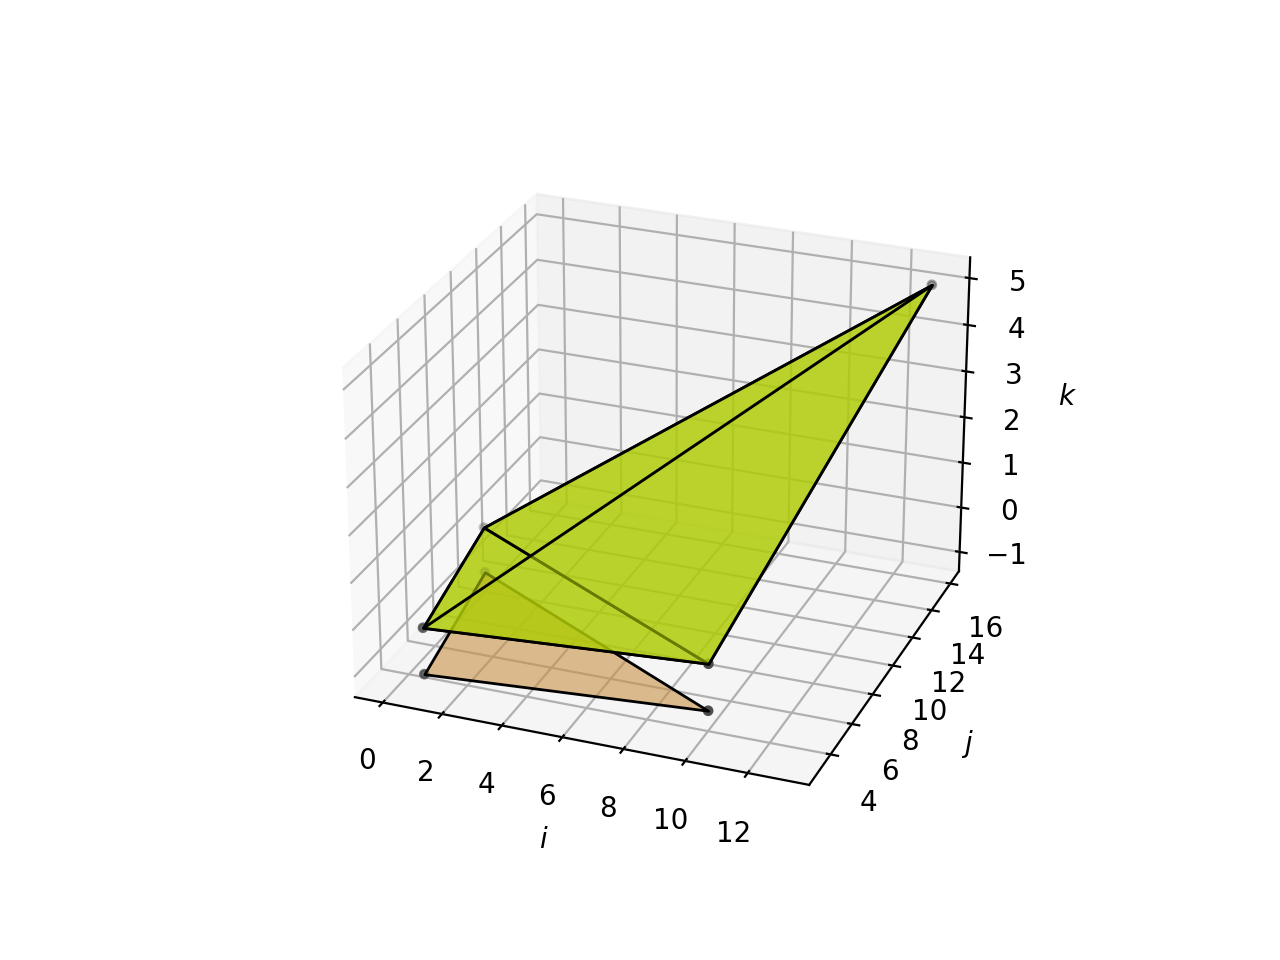

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [11]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[1,3,0]; [10,4,0]; [0,10,0]; [13,16,5];}').convex_hull()
S = [s]

i1 = Set('{[1,3,0]; [10,4,0]; [0,10,0];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j,k-1]}'))
S += [i1]

plot_3d_sets(S)

### resolution - boundary cut through a covered bottom edge gives one good B1 tetrahedron & one in scenario 2

<IPython.core.display.Javascript object>


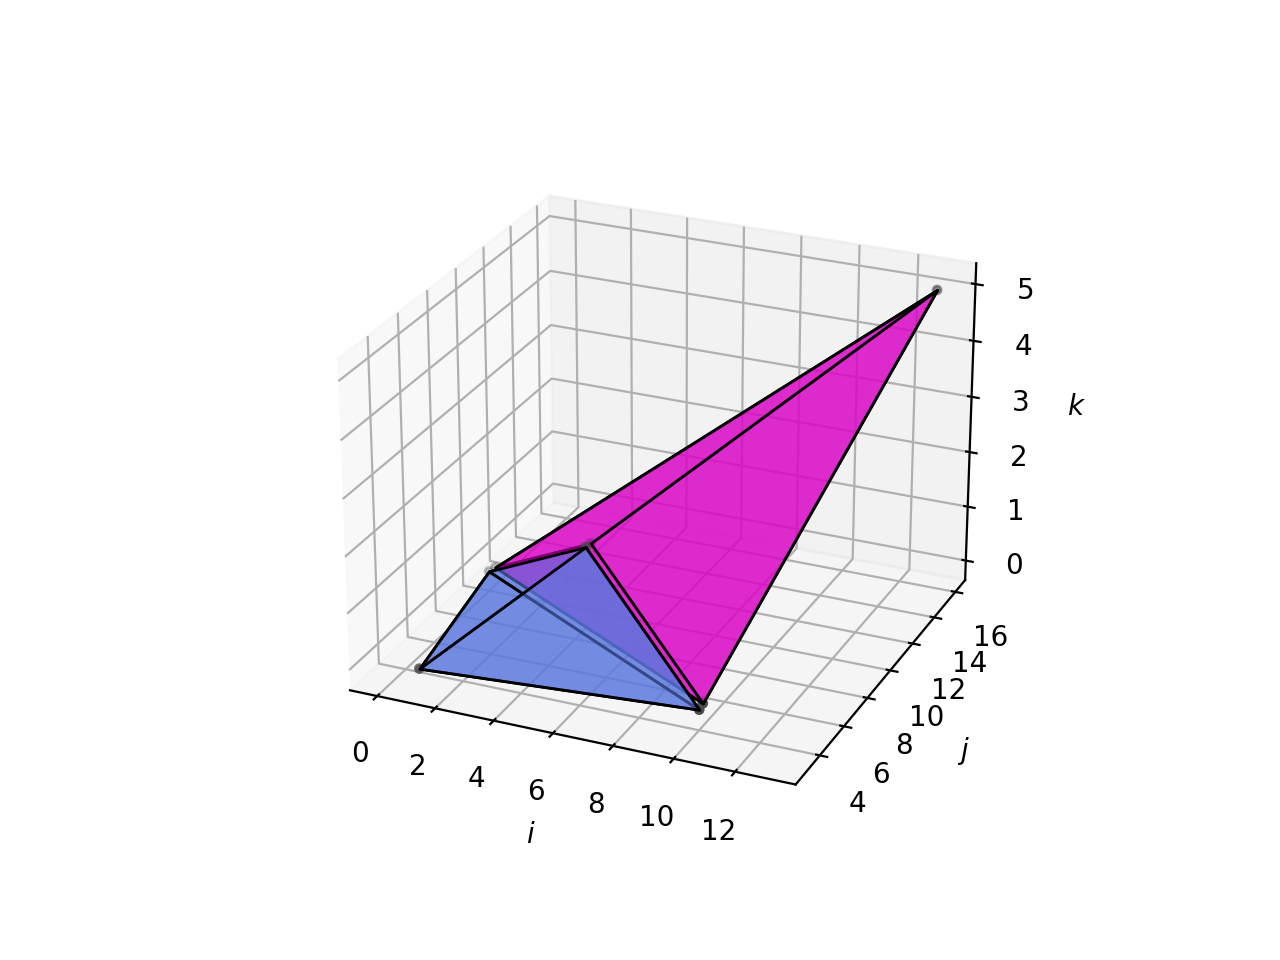

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [12]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[1,3,0]; [10,4,0]; [0,10,0]; [13,16,5];}').convex_hull()

# resolution
S = split(s, "10j=100-6i")

plot_3d_sets(S)

## Scenario 2) 1 boundary face, 3 oblique faces

## Scenario 2a) 1 boundary face, 3 oblique faces - third vertex interior

<IPython.core.display.Javascript object>


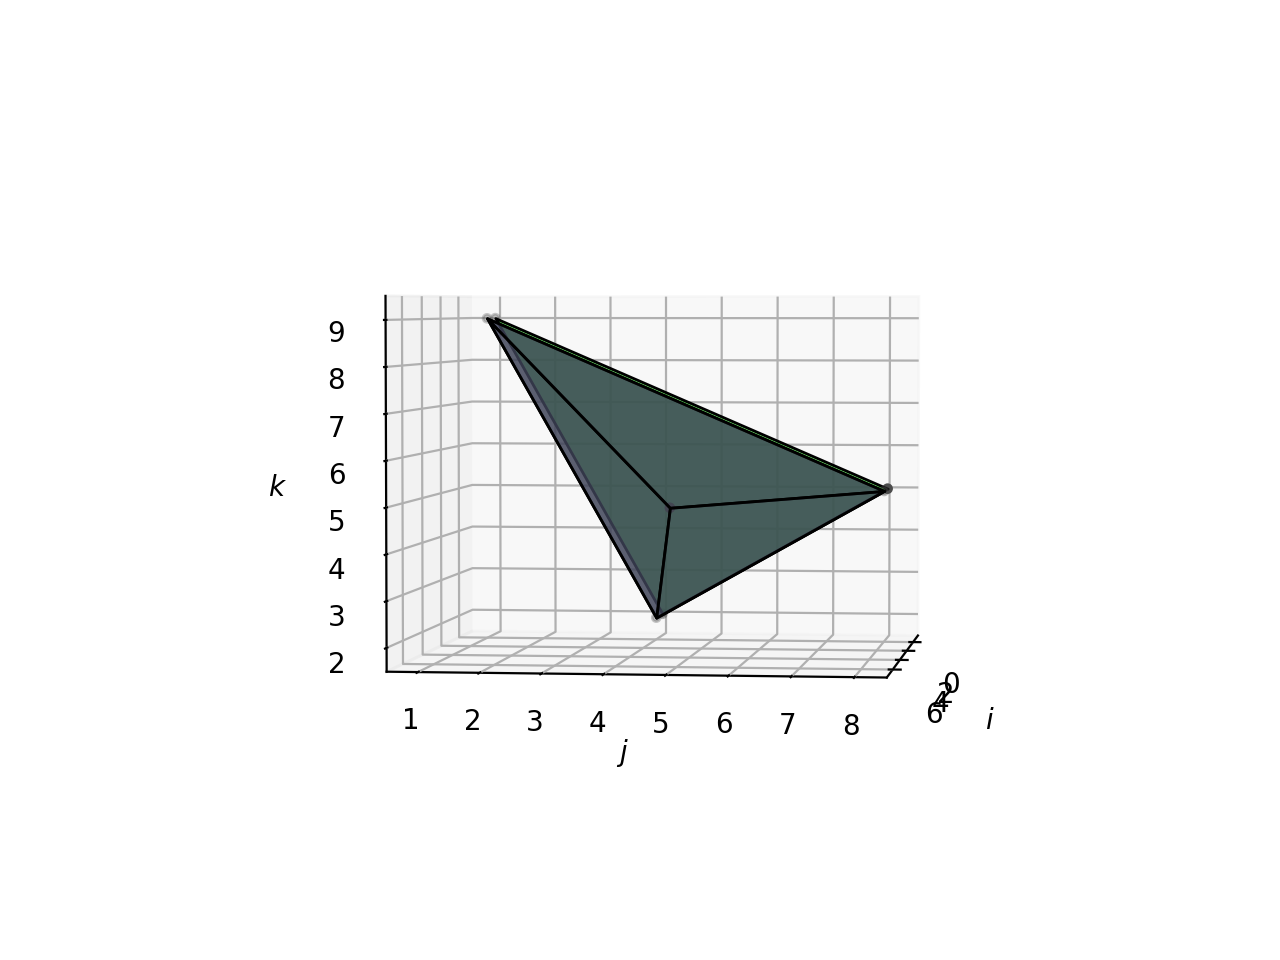

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [13]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[0,4,2]; [0,8,5]; [0,1,9]; [7,5,5];}').convex_hull()
S = [s]

i1 = Set('{[0,4,2]; [0,8,5]; [0,1,9];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))
S += [i1]

plot_3d_sets(S)

### resolution - done, $\exists \rho$ to label all oblique faces as $\oplus$-faces

## Scenario 2b) 1 boundary face, 3 oblique faces - third vertex exterior

<IPython.core.display.Javascript object>


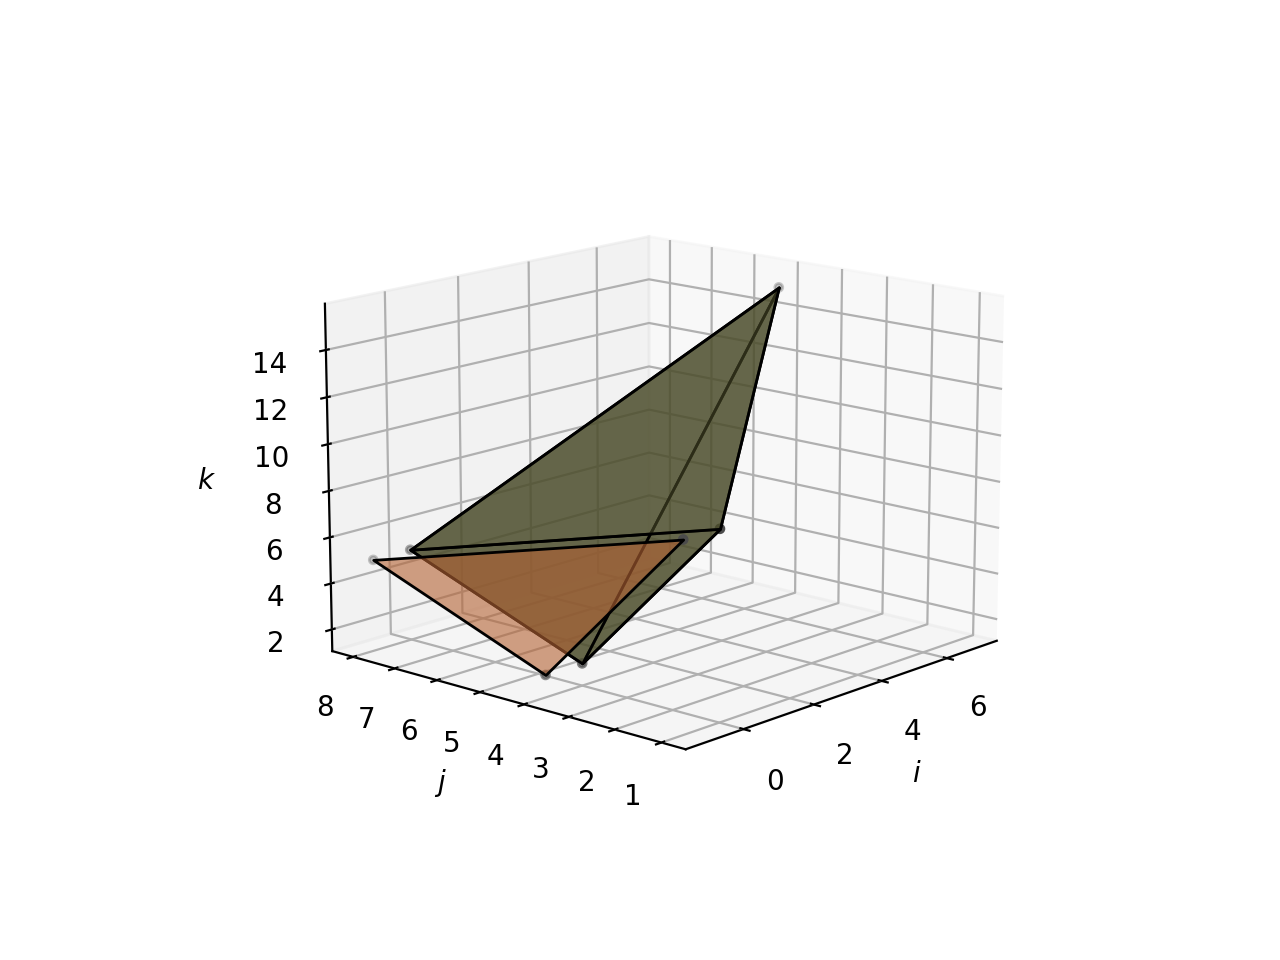

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [14]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[0,4,2]; [0,8,5]; [0,1,9]; [7,5,15];}').convex_hull()
S = [s]

i1 = Set('{[0,4,2]; [0,8,5]; [0,1,9];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))
S += [i1]

plot_3d_sets(S)

### resolution - boundary cut through middle (when projected onto ij-plane) edge gives two pieces in scenario 3

<IPython.core.display.Javascript object>


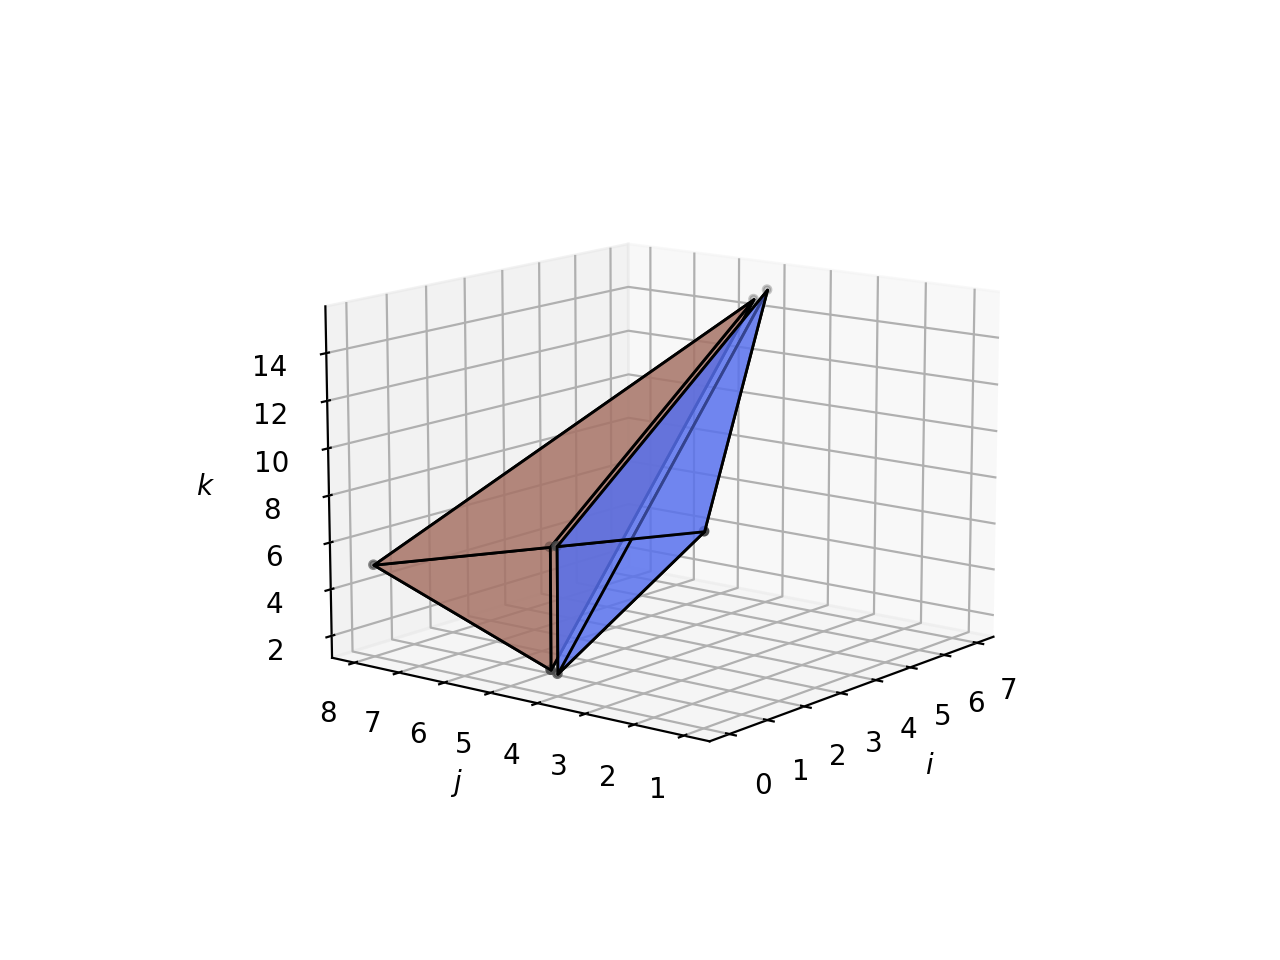

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [15]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[0,4,2]; [0,8,5]; [0,1,9]; [7,5,15];}').convex_hull()

# resolution
S = split(s, "7j = 28 + i")

plot_3d_sets(S)